# 지도학습 (회귀)

1. 데이터 불러오기
2. 선형 회귀
3. 릿지 회귀
4. 라쏘 회귀
5. 엘라스틱넷 회귀
6. 랜덤포레스트 & XGBoost
7. 하이퍼파라미터 튜닝
8. 평가(회귀)

<br>

### 데이터 불러오기

In [78]:
# 라이브러리 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [79]:
# 데이터 생성
from sklearn.datasets import load_diabetes  # 당뇨병 환자 데이터

def make_dataset():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1), df['target'], test_size=0.2, random_state=1004)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = make_dataset()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [80]:
# train 샘플
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
152,-0.034575,0.050680,-0.000817,0.070072,0.039710,0.066952,-0.065491,0.108111,0.026717,0.073480
417,-0.052738,-0.044642,0.071397,-0.074527,-0.015328,-0.001314,0.004460,-0.021412,-0.046883,0.003064
172,0.041708,0.050680,0.071397,0.008101,0.038334,0.015909,-0.017629,0.034309,0.073407,0.085907
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
296,0.067136,-0.044642,-0.061174,-0.040099,-0.026336,-0.024487,0.033914,-0.039493,-0.056153,-0.059067


In [81]:
# 타겟 샘플
#  - target: 당뇨병 진행 정도 지표
y_train.head()

,target
152,292.0
417,55.0
172,295.0
438,104.0
296,89.0


<Axes: >

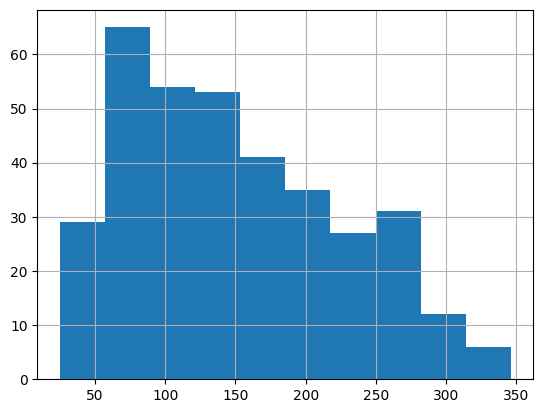

In [82]:
# 타겟 확인
y_train.hist()

---

<br>
<br>

## 선형 회귀


선형회귀
- 단순 선형 회귀: 독립변수(피처)가 1개
- 다중 선형 회귀: 독립변수(피처)가 2개 이상

비용함수 (Cost function)
= 손실함수 (Loss function)
= 목적함수 (Objective function)
- 오차(error)를 계산: 실제 값과 예측 값 차이/거리
- 평균 제곱 오차를 최소화하는 파라미터를 찾는다.

경사하강법 (Gradient Descent)
- 오차를 찾아 나가는 방식
- 경사하강법을 활용해 최소 에러 값을 찾는다.
- 비용함수의 기울기 절대값이 가장 작은 지점을 찾아서 오차가 작은 모델을 만든다.

In [83]:
# 선형 회귀
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, lin_reg_pred)
print(f'MSE: {mse}')

MSE: 2707.6318521641583


---

<br>
<br>

## 릿지 회귀

- 오버피팅 문제로 규제(regularization)를 적용한 모델
- 규제 방식: L2 규제
    - 규제를 통해서 모델의 성능을 올릴 수 있다.
- 파라미터(alpha) 값을 활용해 조절
    - alpha 값이 커질수록 회귀 계수 값을 작게 만든다.  
    e.g., Y = W₁·X₁ + W₂·X₂ + W₃·X₃ + ... + Wₙ·Xₙ  
    회귀계수: W, 피처(변수): X

$$
J(θ) = MSE(θ) + α·(1/2)·∑[i=1 to n] (θᵢ)²
$$

In [84]:
# 릿지 회귀 (alpha=1: default)
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, ridge_pred)
print(f'MSE: {mse}')

MSE: 3522.1191842072667


In [85]:
# 회귀 계수 (alpha=1: default)
ridge_coef = pd.DataFrame(data=ridge.coef_, index=X_train.columns, columns=['alpha1'])
ridge_coef

,alpha1
age,31.293421
sex,-71.448655
bmi,267.605962
bp,197.362492
s1,14.613257
s2,-13.884237
s3,-124.649836
s4,106.212967
s5,221.068493
s6,101.202546


In [86]:
# 릿지 회귀 (alpha=10)
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, ridge_pred)
print(f'MSE: {mse}')

MSE: 5521.884843903383


In [87]:
# 회귀 계수 (alpha=10)
ridge_coef['alpha10'] = ridge.coef_
ridge_coef

,alpha1,alpha10
age,31.293421,16.703166
sex,-71.448655,-1.796418
bmi,267.605962,61.026376
bp,197.362492,47.434846
s1,14.613257,18.491238
s2,-13.884237,13.440104
s3,-124.649836,-35.542087
s4,106.212967,38.896140
s5,221.068493,55.276290
s6,101.202546,35.868345


In [88]:
# 릿지 회귀 (alpha=0.1)
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, ridge_pred)
print(f'MSE: {mse}')

MSE: 2744.9026742146693


In [89]:
# 회귀 계수 (alpha=0.1)
ridge_coef['alpha0.1'] = ridge.coef_
ridge_coef

,alpha1,alpha10,alpha0.1
age,31.293421,16.703166,4.275162
sex,-71.448655,-1.796418,-205.210484
bmi,267.605962,61.026376,450.909749
bp,197.362492,47.434846,331.923682
s1,14.613257,18.491238,-84.311149
s2,-13.884237,13.440104,-54.662514
s3,-124.649836,-35.542087,-158.706512
s4,106.212967,38.896140,114.066890
s5,221.068493,55.276290,391.231834
s6,101.202546,35.868345,78.555458


In [90]:
# 릿지 회귀 (alpha=0.05)
ridge = Ridge(alpha=0.05)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, ridge_pred)
print(f'MSE: {mse}')

MSE: 2699.6595785438317


In [91]:
# 회귀 계수 (alpha=0.05)
ridge_coef['alpha0.05'] = ridge.coef_
ridge_coef

,alpha1,alpha10,alpha0.1,alpha0.05
age,31.293421,16.703166,4.275162,-0.508850
sex,-71.448655,-1.796418,-205.210484,-223.345659
bmi,267.605962,61.026376,450.909749,469.447848
bp,197.362492,47.434846,331.923682,348.368885
s1,14.613257,18.491238,-84.311149,-146.952481
s2,-13.884237,13.440104,-54.662514,-18.297550
s3,-124.649836,-35.542087,-158.706512,-141.658486
s4,106.212967,38.896140,114.066890,115.860926
s5,221.068493,55.276290,391.231834,432.508101
s6,101.202546,35.868345,78.555458,69.578796


---

<br>
<br>

## 라쏘 회귀

- 오버피팅 문제로 규제(regularization)를 적용한 모델
- 규제 방식: L1 규제 (중요한 피처만 선택하는 특성)
- L2에 비해 회귀 계수를 급격히 감소시켜 중요하다고 생각하는 피처만 선택하고 나머지는 0으로 만듦

$$
J(\theta) = \mathrm{MSE}(\theta) + \alpha \sum_{i=1}^{n} |\theta_i|
$$

In [92]:
# 라쏘 회귀 (alpha=1: default)
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, lasso_pred)
print(f'MSE: {mse}')

MSE: 4179.152642946343


In [93]:
# 회귀 계수 (alpha=1: default)
lasso_coef = pd.DataFrame(data=lasso.coef_, index=X_train.columns, columns=['alpha1'])
lasso_coef

,alpha1
age,0.000000
sex,-0.000000
bmi,343.589790
bp,46.369923
s1,0.000000
s2,0.000000
s3,-0.000000
s4,0.000000
s5,245.170617
s6,0.000000


In [94]:
# 라쏘 회귀 (alpha=2)
lasso = Lasso(alpha=2)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, lasso_pred)
print(f'MSE: {mse}')

MSE: 6398.637179449031


In [95]:
# 회귀 계수 (alpha=2)
lasso_coef['alpha2'] = lasso.coef_
lasso_coef

,alpha1,alpha2
age,0.000000,0.000000
sex,-0.000000,0.000000
bmi,343.589790,42.963888
bp,46.369923,0.000000
s1,0.000000,0.000000
s2,0.000000,0.000000
s3,-0.000000,-0.000000
s4,0.000000,0.000000
s5,245.170617,0.000000
s6,0.000000,0.000000


In [96]:
# 라쏘 회귀 (alpha=0.05)
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, lasso_pred)
print(f'MSE: {mse}')

MSE: 2703.4583679188177


In [97]:
# 회귀 계수 (alpha=0.05)
lasso_coef['alpha0.05'] = lasso.coef_
lasso_coef

,alpha1,alpha2,alpha0.05
age,0.000000,0.000000,-0.000000
sex,-0.000000,0.000000,-198.948213
bmi,343.589790,42.963888,487.198584
bp,46.369923,0.000000,340.490360
s1,0.000000,0.000000,-95.576361
s2,0.000000,0.000000,-0.000000
s3,-0.000000,-0.000000,-189.867452
s4,0.000000,0.000000,10.487703
s5,245.170617,0.000000,457.332197
s6,0.000000,0.000000,39.292925


---

<br>
<br>

## 엘라스틱넷 회귀

- 오버피팅 문제로 규제(regularization)를 적용한 모델
- 규제 방식: L2 규제와 L1 규제 결합
- 시간이 상대적으로 오래 걸림
$$
J(\theta) = \text{MSE}(\theta) + r\alpha \sum_{i=1}^{n} |\theta_i| + \frac{1}{2}(1 - r)\alpha \sum_{i=1}^{n} \theta_i^2
$$


<br>


규제방식 비교

- 릿지 회귀 : L2 규제 방식
- 라쏘 회귀 : L1 규제 방식 (중요한 피처만 선택하는 특성)
- 엘라스틱넷 회귀 : L2 + L1 규제 결합 방식


In [98]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()
elastic.fit(X_train, y_train)
elastic_pred = elastic.predict(X_test)

mse = mean_squared_error(y_test, elastic_pred)
print(f'MSE: {mse}')

MSE: 6539.270961171604


In [99]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.0001, l1_ratio=0.6)
elastic.fit(X_train, y_train)
elastic_pred = elastic.predict(X_test)

mse = mean_squared_error(y_test, elastic_pred)
print(f'MSE: {mse}')

MSE: 2675.6031657225312


---

<br>
<br>

## 랜덤포레스트 & XGBoost

랜덤포레스트
- 여러 개의 의사결정 트리로 구성
- 앙상블 방법 중 배깅(bagging) 방식
- 부트스트랩 샘플링 (데이터셋 중복 허용)
- 최종 다수결 투표

XGBoost
- eXtreme Gradient Boosting
- 트리 앙상블 중 성능이 좋은 알고리즘
- 약한 학습기가 계속해서 업데이트를 하며 좋은 모델을 만들어 간다.

<br>

In [100]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg_pred = rf_reg.predict(X_test)

mse = mean_squared_error(y_test, rf_reg_pred)
print(f'MSE: {mse}')

MSE: 3312.490876404494


In [101]:
# XGBoost
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_reg_pred = xgb_reg.predict(X_test)

mse = mean_squared_error(y_test, xgb_reg_pred)
print(f'MSE: {mse}')

MSE: 4265.475533439266


---

<br>
<br>

## 하이퍼파라미터 튜닝

GridSearchCV

- grid search를 통해 최적의 하이퍼파라미터를 찾음
- 모든 경우의 수를 탐색하기 때문에 시간 오래 걸림

RandomizedSearchCV

- GridSearchCV와 달리 랜덤으로 N개의 조합만 탐색함
- 시간 내 최적의 하이퍼파라미터 탐색

<br>

In [158]:
# 라이브러리 불러오기
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [159]:
# 하이퍼파라미터
params={'learning_rate': [0.07, 0.05],
        'max_depth': [3, 5, 7],
        'n_estimators': [100, 200],
        'subsample': [0.9, 0.8, 0.7]
        }

In [160]:
# 데이터셋 로드
def make_dataset2():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    return df.drop('target', axis=1), df['target']

X, y = make_dataset2()

<br>

### GirdSearch

In [161]:
# GridSearch
xgb_reg = XGBRegressor()
grid = GridSearchCV(xgb_reg, params, cv=3, n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.07, 0.05], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200],
                         'subsample': [0.9, 0.8, 0.7]})

In [162]:
# 최적의 하이퍼파라미터
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}

In [163]:
# 하이퍼파라미터 튜닝
xgb_reg = XGBRegressor(
    learning_rate=0.05,
    max_depth=3,
    n_estimators=100,
    subsample=0.7
)

xgb_reg.fit(X_train, y_train)
xgb_reg_pred = xgb_reg.predict(X_test)

mse = mean_squared_error(y_test, xgb_reg_pred)
print(f'MSE: {mse}')

MSE: 3020.722217577996


<br>

### RandomSearch

In [148]:
# RandomSearch
xgb_reg = XGBRegressor()
grid = RandomizedSearchCV(xgb_reg, params, cv=3, n_iter=10, n_jobs=-1)
grid.fit(X, y)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.07, 0.05],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.9, 0.8, 0.7]})

In [149]:
# 최적의 하이퍼파라미터
grid.best_params_

{'subsample': 0.7, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.07}

In [151]:
# # 하이퍼파라미터 튜닝
# xgb_reg = XGBRegressor(
#     learning_rate=0.07,
#     max_depth=3,
#     n_estimators=100,
#     subsample=0.7
# )

# xgb_reg.fit(X_train, y_train)
# xgb_reg_pred = xgb_reg.predict(X_test)

# mse = mean_squared_error(y_test, xgb_reg_pred)
# print(f'MSE: {mse}')

MSE: 3065.5374240293545


---

<br>
<br>

## 평가(회귀)

| 평가 지표 | - | 설명 | 추가 설명 |
|-----------|-------------------------------|---------------------------------------------------|---------------------------------------------------------------|
| MAE       | Mean Absolute Error<br>평균 절대 오차           | 실제 값과 예측 값의 차이 → 절댓값 평균 | 단위 그대로 해석 가능, 이상치에 강함                         |
| MSE       | Mean Squared Error<br>평균 제곱 오차            | 실제 값과 예측 값의 차이 → 제곱해 평균 | 오차가 클수록 더 큰 패널티, 이상치에 민감                     |
| RMSE      | Root Mean Squared Error<br>MSE에 루트를 씌운 값   | MSE가 실제 오차보다 커지는 특성 있어 루트로 보정             | |
| RMSLE     | Root Mean Squared Log Error<br>RMSE에 로그 적용  | 예측 값이 실제 값보다 작을 때 더 큰 패널티 | e.g., 배달 20분을 예측했는데 40분 걸리면 문제가 됨
| R²        | R Squared Score<br>결정계수     | 실제 값의 분산 대비 예측 값의 분산 계산         | **1에 가까울수록** 설명력이 높음(성능이 좋음)                                 |

<br>

- MAE: $\frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|$

- MSE: $\frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2$

- RMSE: $\sqrt{ \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 }$

- RMSLE: $\sqrt{ \frac{1}{n} \sum_{i=1}^{n} \left( \log(\hat{y}_i + 1) - \log(y_i + 1) \right)^2 }$

- R²: $R^2 = 1 - \frac{ \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 }{ \sum_{i=1}^{n} \left( y_i - \bar{y} \right)^2 }$


In [153]:
# MAE
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, xgb_reg_pred)
print(f'MAE: {mae}')

MAE: 46.60036254197024


In [154]:
# MSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, xgb_reg_pred)
print(f'MSE: {mse}')

MSE: 3020.722217577996


In [155]:
# RMSE
import numpy as np
np.sqrt(mean_squared_error(y_test, xgb_reg_pred))
# np.sqrt(mse)

np.float64(54.96109731053408)

In [156]:
# RMSLE
from sklearn.metrics import mean_squared_log_error

rmsle = np.sqrt(mean_squared_log_error(y_test, xgb_reg_pred))
print(f'RMSLE: {rmsle}')

RMSLE: 0.42394136354124684


In [157]:
# R2
from sklearn.metrics import r2_score

r2 = r2_score(y_test, xgb_reg_pred)
print(f'R2: {r2}')

R2: 0.5386462845667569
